<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting Started</a></span></li><li><span><a href="#Our-Data" data-toc-modified-id="Our-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Our Data</a></span></li><li><span><a href="#Counting" data-toc-modified-id="Counting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Counting</a></span><ul class="toc-item"><li><span><a href="#Counting-Unigrams" data-toc-modified-id="Counting-Unigrams-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Counting Unigrams</a></span><ul class="toc-item"><li><span><a href="#Stopwords:-An-Aside" data-toc-modified-id="Stopwords:-An-Aside-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Stopwords: An Aside</a></span></li></ul></li><li><span><a href="#Counting-N-grams" data-toc-modified-id="Counting-N-grams-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Counting N-grams</a></span></li><li><span><a href="#N-gram-Probability-Distributions" data-toc-modified-id="N-gram-Probability-Distributions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>N-gram Probability Distributions</a></span></li></ul></li><li><span><a href="#N-gram-Language-Models" data-toc-modified-id="N-gram-Language-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>N-gram Language Models</a></span><ul class="toc-item"><li><span><a href="#Our-Very-Own-Bigram-Language-Model" data-toc-modified-id="Our-Very-Own-Bigram-Language-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Our Very Own Bigram Language Model</a></span></li><li><span><a href="#nltk's-Bigram-Language-Model" data-toc-modified-id="nltk's-Bigram-Language-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>nltk's Bigram Language Model</a></span></li></ul></li><li><span><a href="#Generating-Sentences!-Making-the-Language-Model-Speak" data-toc-modified-id="Generating-Sentences!-Making-the-Language-Model-Speak-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generating Sentences! Making the Language Model Speak</a></span><ul class="toc-item"><li><span><a href="#&quot;Manual&quot;-Sentence-Generation" data-toc-modified-id="&quot;Manual&quot;-Sentence-Generation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>"Manual" Sentence Generation</a></span><ul class="toc-item"><li><span><a href="#Greedy-Method" data-toc-modified-id="Greedy-Method-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Greedy Method</a></span></li><li><span><a href="#Random-Seed-Method-(Better)" data-toc-modified-id="Random-Seed-Method-(Better)-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Random Seed Method (Better)</a></span></li></ul></li><li><span><a href="#nltk-Sentence-Generation" data-toc-modified-id="nltk-Sentence-Generation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>nltk Sentence Generation</a></span></li></ul></li><li><span><a href="#Appendices" data-toc-modified-id="Appendices-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendices</a></span><ul class="toc-item"><li><span><a href="#Appendix-A:-Working-with-Raw-Data" data-toc-modified-id="Appendix-A:-Working-with-Raw-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Appendix A: Working with Raw Data</a></span></li><li><span><a href="#Appendix-B:-Smoothing" data-toc-modified-id="Appendix-B:-Smoothing-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Appendix B: Smoothing</a></span></li><li><span><a href="#Appendix-C:-Evaluating-Language-Models" data-toc-modified-id="Appendix-C:-Evaluating-Language-Models-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Appendix C: Evaluating Language Models</a></span></li></ul></li></ul></div>

**Instructions**: 
In this tutorial, we will be creating an **n-gram language model** from scratch and using the language model in a variety of applications.

# Getting Started

To start, let's import a set of libraries we will find useful later on.

In [17]:
%matplotlib inline  

# for manipulating data
from collections import Counter
from collections import defaultdict
import math
import numpy as np
import random
import re

# useful nlp methods
import nltk
from nltk import word_tokenize
from nltk import ngrams
from nltk.lm.preprocessing import padded_everygram_pipeline
nltk.download('punkt')

# plotting
import matplotlib
import matplotlib.pyplot as plt

# printing
from tabulate import tabulate

# downloading data
from urllib import request

# a function to flatten a list
flatten_list = lambda l: [item for sublist in l for item in sublist]

# a function to pretty print a list of tuples
def pretty_print_tuples(tuples, headers):
    '''Pretty print tuples using tabulate.
    
    Parameters
    ----------
    tuples: list[tuple[str]]
        a list of tuples; each tuple must have the same dimensions
    headers: list[str]
        a list of headers to use; this list must be the same size as the number of elements in each tuple

    '''
    table = [list(tup) for tup in tuples]
    print(tabulate(table, headers = headers, floatfmt=".5f"))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eugenetang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Our Data
Our first corpus will be the [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus), a collection of English-language texts from 500 different sources grouped in 15 different categories.(e.g. fiction, news, ... etc.). We can get this particular dataset [directly from nltk](https://www.nltk.org/book/ch02.html). 

In [2]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     /Users/eugenetang/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Conveniently, nltk has methods to give us all the sentences from the corpus. 

In [3]:
#sentences
tokenized_sentences = brown.sents()
print('The Brown corpus has {} sentences.'.format(len(tokenized_sentences)))
print()
print('--Sample sentences--')
for i in range(5):
     print('>> sentence {}:'.format(i), ' '.join(tokenized_sentences[i]))

The Brown corpus has 57340 sentences.

--Sample sentences--
>> sentence 0: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
>> sentence 1: The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
>> sentence 2: The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .
>> sentence 3: `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
>> sentence 4: The jury said it did find that many of Georgia's registr

We'll also note that these sentences come in a form where into separate words (tokenized) for us. To be able to train a language model, we need to know what words are in the text, so having the data already in this form is very convenient. Notably, this form of tokenization also makes each punctuation its own token.

In [4]:
tokenized_sentences[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

There are many things we could do to preprocess the text, such as lowercasing all of the words, stemming, or removing punctuation. However, for this exercise, we'll just keep the text as is.

# Counting

The key to building an n-gram language model is knowing how to count.

## Counting Unigrams

Let's warm up with trying to answer the following question. 

**What are the most common words (or "unigrams") in our corpus?**

To do this, we'll use a python object called a [Counter](https://docs.python.org/3/library/collections.html) to store our data. A Counter is like a dictionary, except it has a default value of 0 when the key does not exist. It also has a convenient `most_common` function to get the most common elements from it.

In [5]:
unigram_counter = Counter()
for sentence in tokenized_sentences:
    for word in sentence:
        unigram_counter[word] += 1

print('Our dataset has {} unique words.'.format(len(unigram_counter)))
print()
print('--Top 10 Unigrams--')
print()
pretty_print_tuples(unigram_counter.most_common(n=10), ['Unigram', 'Count'])

Our dataset has 56057 unique words.

--Top 10 Unigrams--

Unigram      Count
---------  -------
the          62713
,            58334
.            49346
of           36080
and          27915
to           25732
a            21881
in           19536
that         10237
is           10011


As one might expect, we see words like "the", "of", "and"... etc. We can also plot this to see the relative frequencies.

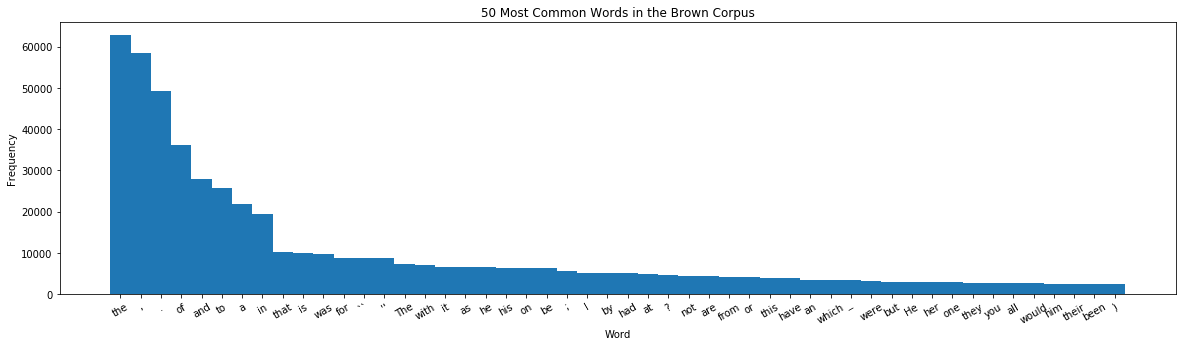

In [6]:
# gather the data
most_common_words = unigram_counter.most_common(n=50)
indexes = np.arange(len(most_common_words))
labels = [l for l,v in most_common_words]
values = [v for l,v in most_common_words]

# create the plot
width = 1
plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=30)
plt.title('50 Most Common Words in the Brown Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

The plot shows a phenomenon commonly known as [Zipf's law](https://nlp.stanford.edu/IR-book/html/htmledition/zipfs-law-modeling-the-distribution-of-terms-1.html), which says that the most common words show up exponentially more often than less common words.

### Stopwords: An Aside

Here we'll notice that a lot of punctuation show up as the top words, as well as [stopwords](https://en.wikipedia.org/wiki/Stop_words) such as "the", "of", and "and". While we won't want to remove stopwords or punctuation in our n-gram model, doing so here can help us find some more interesting top words and understand our data better. While there is no universally-accepted list of stopwords, we'll use the stopword list from nltk.

In [7]:
from nltk.corpus import stopwords
print('Sample stopwords:', stopwords.words('english')[0:10])
nltk_stopwords = set(stopwords.words('english'))

Sample stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
unigram_counter = Counter()
for sentence in tokenized_sentences:
    for word in sentence:
        if word.lower() not in nltk_stopwords and word.isalpha():
            unigram_counter[word] += 1
pretty_print_tuples(unigram_counter.most_common(n=10), ['Unigram', 'Count'])

Unigram      Count
---------  -------
one           2873
would         2677
said          1943
could         1580
time          1556
two           1311
may           1292
first         1242
like          1237
man           1151


We can take this list and again plot the most common words

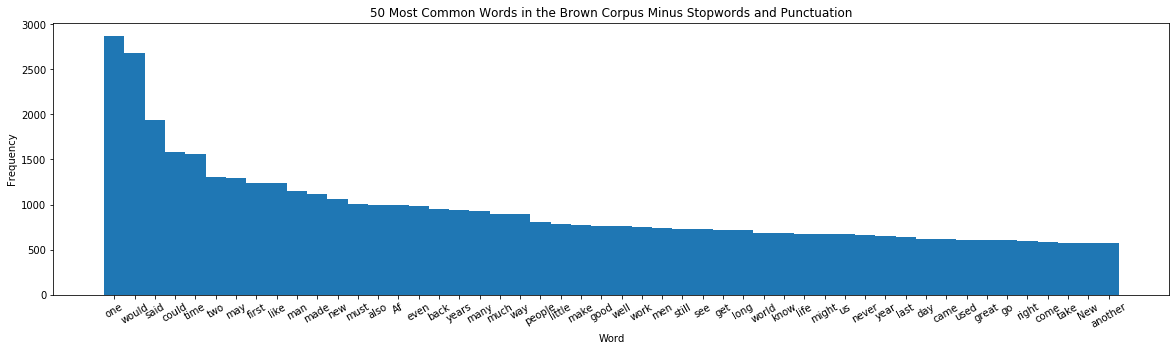

In [9]:
# gather the data
most_common_words = unigram_counter.most_common(n=50)
indexes = np.arange(len(most_common_words))
labels = [l for l,v in most_common_words]
values = [v for l,v in most_common_words]

# create the plot
width = 1
plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=30)
plt.title('50 Most Common Words in the Brown Corpus Minus Stopwords and Punctuation')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Here we see a lot of generic nouns, adjectives, and verbs. This tells us that we have a fairly generic dataset and that no particular topic (e.g. "space") stands out.

## Counting N-grams

Let's move to counting bigrams. To do this, we'll need to make a slight modification to our unigram counting code. As a reminder, when counting bigrams, for a sentence like: "The red dog is Clifford.", the bigrams in the sentence will be: `The red`, `red dog`, `dog is`, `is Clifford`, and `Clifford .`. If we add the special sentence begin and sentence end tokens (trust us, this will be useful in the future), we will also get `<s> The` and `. </s>`. 

In [10]:
SENTENCE_BEGIN = '<s>'
SENTENCE_END = '</s>'

bigram_counter = Counter()

# track the previous word seen
previous_word = SENTENCE_BEGIN
for sentence in tokenized_sentences:
    for word in sentence:
        
        # increment bigram count
        bigram_counter[(previous_word, word)] += 1
        
        # update previous word
        previous_word = word
    
    # add a bigram with sentence end
    bigram_counter[(previous_word, SENTENCE_END)] += 1
    
    # reset the previous word
    previous_word = SENTENCE_BEGIN
    
pretty_print_tuples(bigram_counter.most_common(n=10), ["Bigram", "Count"])

Bigram            Count
--------------  -------
('.', '</s>')     49346
('of', 'the')      9625
('<s>', 'The')     6544
(',', 'and')       6288
('in', 'the')      5546
('<s>', '``')      4168
(',', 'the')       3753
('to', 'the')      3426
("''", '.')        3331
('<s>', 'He')      2859


nltk also conveniently provides a function to help us find the n-grams in a sentence. Look how much shorter the code is now!

In [11]:
bigram_counter = Counter()
for sentence in tokenized_sentences:
    bigrams = ngrams(sentence, 2, pad_right=True, pad_left=True, 
                     left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END)
    for w1, w2 in bigrams:
        bigram_counter[(w1, w2)] += 1
pretty_print_tuples(bigram_counter.most_common(n=10), ["Bigram", "Count"])

Bigram            Count
--------------  -------
('.', '</s>')     49346
('of', 'the')      9625
('<s>', 'The')     6544
(',', 'and')       6288
('in', 'the')      5546
('<s>', '``')      4168
(',', 'the')       3753
('to', 'the')      3426
("''", '.')        3331
('<s>', 'He')      2859


**What are the most common trigrams in our dataset?**

In [12]:
# Exercise
trigram_counter = Counter()
for sentence in tokenized_sentences:
    trigrams = ngrams(sentence, 3, pad_right=True, pad_left=True, 
                      left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END)
    for w1, w2, w3 in trigrams:
        trigram_counter[(w1, w2, w3)] += 1
pretty_print_tuples(trigram_counter.most_common(n=10), ["Trigram", "Count"])

Trigram                  Count
---------------------  -------
('.', '</s>', '</s>')    49346
('<s>', '<s>', 'The')     6544
('<s>', '<s>', '``')      4168
("''", '.', '</s>')       3331
('<s>', '<s>', 'He')      2859
(';', ';', '</s>')        2783
(';', '</s>', '</s>')     2783
('?', '?', '</s>')        2346
('?', '</s>', '</s>')     2346
('<s>', '<s>', 'It')      1926


**Why don't the top bigrams show up in the top trigrams?**
* Hint: which of the top bigrams appear in the top trigrams?

## N-gram Probability Distributions
With these counts, we can start creating probability distributions for n-gram language models. 

Remember that the core principle behind language models is predicting the probability of a word given its context. In n-gram language models, we assume that the "context" is the last $n-1$ words. Therefore, we want to find the distribution: 

$$P(W_k|w_{k-1}, w_{k-2}, ..., w_{k-n+1})$$

Let's start by creating a probability distribution needed for a bigram language model.

$$P(W_k|w_{k-1})$$

We can compute the probabilities from our data by making the following approximation:

$$P(w_k|w_{k-1}) \approx \frac{count(w_k, w_{k-1})}{\sum_w count(w, w_{k-1})} = \frac{count(w_k, w_{k-1})}{count(w_{k-1})}$$

This approximation is also called the *Maximum Likelihood Estimator (MLE)*.

To be able to do this well, we'll need to store our bigrams slightly differently. Instead of counting each bigram directly, we will map each "context" to the number of times each word follows that context.

In [23]:
bigram_context_counter = {}
for sentence in tokenized_sentences:
    for w1, w2 in ngrams(sentence, 2, pad_right=True, pad_left=True, 
                         left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END):
        # add a counter for the given context if we haven't seen it before
        if w1 not in bigram_context_counter:
            bigram_context_counter[w1] = Counter()
        
        # increment: we've seen an example of w2 after w1
        bigram_context_counter[w1][w2] += 1

Now, we can easily start answering more interesting questions, such as: 

**What are the most common words that start a sentence?**

In [24]:
# Exercise (Sentence_Begin)
top_10_starting_words = bigram_context_counter[SENTENCE_BEGIN].most_common(n = 10)
pretty_print_tuples(top_10_starting_words, ['Word', 'Count'])

Word      Count
------  -------
The        6544
``         4168
He         2859
It         1926
In         1704
I          1375
But        1271
This       1109
A          1064
She         880


Using the equation above, we can use these counts to derive a probability distribution.

$$P(w_k|w_{k-1}) \approx \frac{count(w_k, w_{k-1})}{count(w_{k-1})}$$

In [26]:
def get_word_probabilities(word_counter):
    '''Returns a probability distribution across the words.
    
    Parameters
    ----------
    word_counter: Counter
        A counter object containing words and their counts
    '''
    total_counts = sum(word_counter.values())
    return {word: count/total_counts for word, count in word_counter.items()}

sentence_begin_probs = get_word_probabilities(bigram_context_counter[SENTENCE_BEGIN])
sorted_sentence_begin_probs = sorted(sentence_begin_probs.items(), key=lambda x: x[1], reverse=True)

# show top distributions
pretty_print_tuples(sorted_sentence_begin_probs[0:10], ['Word', 'Probability'])

Word      Probability
------  -------------
The           0.11413
``            0.07269
He            0.04986
It            0.03359
In            0.02972
I             0.02398
But           0.02217
This          0.01934
A             0.01856
She           0.01535


**What are the most common words that come after "blue"?**

In [27]:
# Exercise
pretty_print_tuples(bigram_context_counter['blue'].most_common(n = 10), ['Word', 'Count'])

Word      Count
------  -------
eyes         16
and          13
,            10
.             4
sky           4
ribbon        3
of            3
had           2
wool          2
rug           2


**How many times does "blue sky" appear?**

In [28]:
# Exercise
bigram_context_counter['blue']['sky']

4

**What is the probability "sky" comes after the word "blue"?**

In [29]:
# Exercise
get_word_probabilities(bigram_context_counter['blue'])['sky']

0.041237113402061855

# N-gram Language Models

## Our Very Own Bigram Language Model

With the data structure we made above, we actually have created a bigram language model! To make this clear, let's rename our variable to indicate it's a language.

In [31]:
lm_bigram_manual = bigram_context_counter

Recall that the goal of a language model is to be able to assign probabilities to sequences of words. We can do that with a bigram language model via the following formula.

$$P(w_1, w_2, ..., w_n) = P(w_2|w_1)* P(w_3|w_2) * ... * P(w_n|w_{n-1})$$ 

**What is the probability of seeing the sentence "The blue sky is beautiful."?**

In [32]:
# here, we add the sentence begin and sentence end tokens
bigrams = ngrams(['The', 'blue', 'sky', 'is', 'beautiful', '.'], 2, pad_right=True, pad_left=True,
                 left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END)

p = 1
for w1, w2 in bigrams:
    # update the probability with the bigram probability
    p *= get_word_probabilities(lm_bigram_manual[w1])[w2]
print('The probability of "The blue sky is beautiful." is:', p)

The probability of "The blue sky is beautiful." is: 2.2753217479456107e-13


Wow, that's a small number! To help with this, people often will actually use log-probabilities.

In [33]:
print('The log-probability of "The blue sky is beautiful." is:', math.log(p))

The log-probability of "The blue sky is beautiful." is: -29.111484738851228


## nltk's Bigram Language Model

There's no need to reinvent the wheel. Now that we've walked through a basic example of constructing and using our language model, let's take advantage of with [nltk's implementation of ngram language models](https://www.nltk.org/api/nltk.lm.html). Behind the scenes they basically do what we did above as well as some additional bells and whistles.

In [34]:
from nltk.lm import MLE

n = 2 # let's create a bigram language model
lm_bigram_nltk = MLE(n) 
len(lm_bigram_nltk.vocab) # we have no words in our vocabulary yet!

0

Now, let's add some data. To do this, we'll call [padded_everygram_pipeline](https://www.nltk.org/api/nltk.lm.html#nltk.lm.preprocessing.padded_everygram_pipeline) from nltk to get the data into a form that is friendly to the language model object. `train_text` contains every unigram and bigram from each sentence for counting while `text_vocab` contains the vocabulary of our corpus.

In [35]:
train_text, text_vocab = padded_everygram_pipeline(n, tokenized_sentences)

Now that we've got our training data, let's train it!

In [36]:
# this cell takes a few minutes to run
lm_bigram_nltk.fit(train_text, vocabulary_text=text_vocab)

In [37]:
len(lm_bigram_nltk.vocab)

56060

Using ``lm_bigram_nltk``, we can again answer: 

**What are the most common words that come after "blue"?**

Note that the answer here is the same as that found above.

In [38]:
# due to interesting ways in how tuples work, note that we have to use ('blue', ) instead of 'blue'
pretty_print_tuples(lm_bigram_nltk.counts[('blue',)].most_common(n=10), ['Word', 'Count'])

Word      Count
------  -------
eyes         16
and          13
,            10
.             4
sky           4
ribbon        3
of            3
had           2
wool          2
rug           2


We can also compute probabilities like before.

$P("sky" | "blue")$

In [39]:
lm_bigram_nltk.score('sky', ['blue'])

0.041237113402061855

Note that the probability below is the same as what we computed before as well.

Let's now revisit the question. **What is the probability of seeing the sentence "The blue sky is beautiful."?**

In [40]:
bigrams = ngrams(['The', 'blue', 'sky', 'is', 'beautiful', '.'], 2, pad_right=True, pad_left=True,
                 left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END)
p = 1
for w1, w2 in bigrams:
    # update the probability with the bigram probability
    p *= lm_bigram_nltk.score(w2, [w1]) # note that the order here is reversed from our function above
print('The probability of "The blue sky is beautiful." is:', p)

The probability of "The blue sky is beautiful." is: 2.2753217479456107e-13


# Generating Sentences! Making the Language Model Speak

One way we could use this language model is to generate random sentences, like this [Automatic CS Paper Generator](https://pdos.csail.mit.edu/archive/scigen/). We'll start with implementing this using our "manual" language model to drive the points home, and then use nltk's implementation. 

## "Manual" Sentence Generation

### Greedy Method

One way we could do this is start with the token `<s>`, and then keep picking the word most likely to follow the token until we get a `<\s>` token. This we will call the Greedy Method.

In [41]:
def generate_greedy_sentence():
    context = SENTENCE_BEGIN
    sentence = []
    next_word = lm_bigram_manual[context].most_common(n=1)[0][0]
    
    # keep getting the next most likely word until we get to the </s> token or 
    # until our sentence is over 100 words long.
    while next_word != SENTENCE_END and len(sentence) < 100:
        # append the word to the sentence
        sentence.append(next_word)
        # update the bigram context
        context = next_word
        # get most likely next word
        next_word = lm_bigram_manual[context].most_common(n=1)[0][0]
    return sentence
print(" ".join(generate_greedy_sentence()))

The first time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and the same time , and


**What do you think is wrong with this approach?**

### Random Seed Method (Better)

To get some more diverse sentences, we can generate random sentences by repeatedly computing $P(W_k|w_{k-1}, w_{k-2})$ and then selecting a word at random from that distribution, and repeating until we get a ``</s>`` token.

In [45]:
def get_random_next_word(lm_manual, ngram):
    '''Based on the given n-gram context, get a random next word.'''
    word_counts = lm_manual[ngram]
    probabilities = get_word_probabilities(word_counts)
    vocabulary = list(word_counts.keys())
    return np.random.choice(vocabulary, 1, p=[probabilities[w] for w in vocabulary])[0]

def generate_random_sentence(lm_manual, text_seed=None, random_seed=None):
    '''Generate a random next sentence based on the seed word. 
    
    Parameters
    ----------
    lm_manual: dict -> Counter
        our manually created language model object
    text_seed: [str]
        a list of strings to seed the sentence with
    random_seed: int
        an integer seed for the randomization
    '''
    np.random.seed(random_seed)
    context = SENTENCE_BEGIN
    sentence = []
    if text_seed is None:
        # generate a random seed word
        next_word = get_random_next_word(lm_manual, context)
    else:
        # check if it will be possible to generate a language model
        if text_seed not in lm_manual:
            raise ValueError('Cannot compute! N-gram model has never seen "{}" start a sentence before.'.format(seed_word))
        next_word = text_seed
    
    while next_word != SENTENCE_END:
        # append the word to the sentence
        sentence.append(next_word)
        
        # update the history
        context = next_word

        # get the next word
        next_word = get_random_next_word(lm_manual, context)
    return sentence

print(' '.join(generate_random_sentence(lm_bigram_manual, 'The', 8)))
print(' '.join(generate_random_sentence(lm_bigram_manual, None, 8)))

The Odyssey is boss '' , `` they could and 4 .
Someone laughed with its associated with more textile machinery that is some boats .


**Play around with the random word and seed and see what other sentences it makes!**
* Try changing the random seed to 5, 6, ... etc.
* Try changing the seed word to "I", "Seed".
* Try changing the seed word to "Globe". What happened?

In [46]:
print(' '.join(generate_random_sentence(lm_bigram_manual, 'Seed', 8)))

Seed crops or /r/ .


## nltk Sentence Generation

ntlk's language model object makes sentence generation easy! Let's try it below.

In [47]:
def generate_sentence(lm, text_seed, random_seed=None):
    '''Generate a random sentence from the given language model.
    
    Parameters
    ----------
    lm: nltk.LanguageModel
        an nltk language model object
    text_seed: [str]
        a list of strings to seed the sentence with
    random_seed: int
        an integer seed for the randomization
    '''
    tokens = lm.generate(50, text_seed=text_seed, random_seed=random_seed)

    # just take the first sentence
    sentence = [] if text_seed is None else text_seed
    for t in tokens:
        if t == SENTENCE_END:
            break
        sentence.append(t)
    return ' '.join(sentence)

print(generate_sentence(lm_bigram_nltk, ['The'], 8))

The answer when Miss Perrin '' , young adults are less often heard a standard


# Appendices

These sections contain some more details than we'll be going into for the talk. They are some pretty interesting stuff though!

## Appendix A: Working with Raw Data

Some datasets won't be conveniently stored in nltk for us, and we may have to process them ourselves to get it into a usable state. For example, here we show how you could get and process the brown corpus in a more raw format.

In [4]:
url = 'http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
raw[0:400]

'The Fulton County Grand Jury said Friday an investigation of Atlanta\'s recent primary election produced "no evidence" that any irregularities took place.   \r\nThe jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.\r\n\r\nThe Se'

This file contains a set of newline-separated ("\r\n") sentences. In addition, on manual observation, we notice some lines are not broken into sentences perfectly. We will also split on ". " as a crude way of catching these cases.

In [5]:
raw_sentences = raw.split('\r\n') # split by newline
print('--Example line with multiple sentences--')
print(raw_sentences[400]) # example line with a period in it

raw_sentences = [re.split(r'(?<=\.) ', sentence) for sentence in raw_sentences] # split by ". "
raw_sentences = flatten_list(raw_sentences)

print()
print('--Sample sentences--')
for i in range(5):
     print('>> sentence {}:'.format(i), raw_sentences[i])

--Example line with multiple sentences--
There has been more activity across the state line in Massachusetts than in Rhode Island in recent weeks toward enforcement of the Sunday sales laws. The statutes, similar in both the Bay State and Rhode Island and dating back in some instances to colonial times, severely limit the types of merchandise that may be sold on the Sabbath.   

--Sample sentences--
>> sentence 0: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced "no evidence" that any irregularities took place.
>> sentence 1:   
>> sentence 2: The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.
>> sentence 3: 
>> sentence 4: The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible "irr

Here we note two things:

1. Some sentences are blank (e.g. sentences 1 and 3). We'll want to remove those.
2. Some words are capitalized while others are not. Some are proper nouns while others are the beginning of sentences. To help standardize this, let's lowercase all of the words (e.g. "Only" at the beginning of a sentence and "only" in the middle of a sentence are still the same).

In order to build a language model. We also need to be able to split a sentence into words. Thankfully, there's a function from nltk called word_tokenize that can do this for us.

In [ ]:
def preprocess_sentence(s):
    # remove trailing whitespace
    s = s.strip()
    
    # lowercase all tokens
    s = s.lower()
    
    # split into tokens
    s = word_tokenize(s)
    
    return s

# preprocess each sentence and also remove empty sentences
tokenized_sentences = [preprocess_sentence(s) for s in raw_sentences]
tokenized_sentences = [s for s in tokenized_sentences if len(s) > 0]

# print sample sentences
print('We have {} sentences in total.'.format(len(tokenized_sentences)))
print()
print('--Sample tokenized sentences--')
for i in range(5):
    print('>> sentence {}:'.format(i), tokenized_sentences[i])
    print()

Better, now we can use the output to train language models as well!

## Appendix B: Smoothing

Let's start with a motivating example.

**What is the probability of seeing the sentence "The blue sky is beautifully painted."?**

In [147]:
bigrams = ngrams(['The', 'blue', 'sky', 'is', 'beautifully', 'painted', '.'], 2, pad_right=True, pad_left=True,
                 left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END)
p = 1
for w1, w2 in bigrams:
    # update the probability with the bigram probability
    p *= lm_bigram_nltk.score(w2, [w1]) # note that the order here is reversed from our function above
print('The probability of "The blue sky is beautifully painted." is:', p)
print('The probability of seeing "beautifully" after "is" is:', lm_bigram_nltk.score('beautifully', ['is']))

The probability of "The blue sky is beautifully painted." is: 0.0
The probability of seeing "beautifully" after "is" is: 0.0


One disadvantage of our current model is that there will be many n-grams we haven't seen before (e.g. "is beautifully"). Though "The blue sky is beautifully painted." is a reasonable sentence, the probability assigned to it is 0. 

To account for this, we can try to "smooth" the data. In essence, smoothing is giving a very small, but non-zero probability to n-grams we have not seen before. The assumption here is that though we have not seen a particular n-gram before, it doesn't mean it has no chance of occurring. [These slides](https://nlp.stanford.edu/~wcmac/papers/20050421-smoothing-tutorial.pdf) have a good description of the various smoothing methods, and [this paper](https://www.aclweb.org/anthology/P96-1041.pdf) for an interesting analysis of the empirical performance of various smoothing methods.

nltk has a couple methods implemented. We'll start with Laplace Smoothing, which adds one to the count of each n-gram.

In [149]:
from nltk.lm import Laplace

n = 2
lm_bigram_laplace = Laplace(n) # we'll start with LaPlace smoothing
train_text, text_vocab = padded_everygram_pipeline(n, tokenized_sentences) # these are generators, so you'll need to make them each time
lm_bigram_laplace.fit(train_text, vocabulary_text=text_vocab)

In [150]:
len(lm_bigram_laplace.vocab) == len(lm_bigram_nltk.vocab)

True

**What is the probability $P("sky"|"blue")$ under LaPlace smoothing? Is it smaller or greater than the probability without LaPlace smoothing?**

In [161]:
print(lm_bigram_laplace.score('sky', ['blue']))
lm_bigram_laplace.score('sky', ['blue']) < lm_bigram_nltk.score('sky', ['blue'])

8.903609523300747e-05


True

**What is the probability of the bigram "is beautifully" now?**

In [160]:
lm_bigram_laplace.score('beautifully', ['is'])

1.5135233309621468e-05

## Appendix C: Evaluating Language Models

One way language models can be evaluated and compared is through a metric called [perplexity](https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3). Perplexity measures how well a probability model predicts a sample (in this case our entire corpus). The lower the perplexity score (the less "perplexed" you are), the better. The formula for perplexity is:

$$Perplexity(w_1,w_2,...,w_N) = P(w_1,w_2,...,w_N)^{\frac{-1}{N}}$$

In an n-gram lanugage model, we can simplify this to:

$$P(w_1,w_2,...,w_N)^{\frac{-1}{N}} = \left(\prod_{i=1}^{N}P(w_i|w_{i-1},w_{i-2}...,w_{i-n+1})\right)^{\frac{-1}{N}}$$

To demonstrate how we might use perplexity, we'll create a training and test datasets, then evaluate a bigram and trigram language model on the test dataset using perplexity.

In [40]:
# this cell takes a few minutes to run
train_sentences = tokenized_sentences[0:-100]
test_sentences = tokenized_sentences[-100:]

def train_and_calculate_perplexity(LMClass, n):
    '''Train and evaluate an n-gram language model.
    
    Trains model with training data on the provided nltk class (LMClass) 
    and computes perplexity on the test set.
    '''
    # train language model
    lm = LMClass(n)
    train_text, text_vocab = padded_everygram_pipeline(n, train_sentences)
    lm.fit(train_text, vocabulary_text=text_vocab)
    
    # compute perplexity on test sentences
    all_ngrams = []
    for sentence in test_sentences:
        all_ngrams.append(ngrams(sentence, lm.order, pad_right=True, pad_left=True,
                           left_pad_symbol=SENTENCE_BEGIN, right_pad_symbol=SENTENCE_END))
    all_ngrams = flatten_list(all_ngrams)

    print('Perplexity of the {}-gram model on the test set:'.format(n), lm.perplexity(all_ngrams))
train_and_calculate_perplexity(MLE, 2)
train_and_calculate_perplexity(MLE, 3)

Perplexity of the 2-gram model on the test set: inf
Perplexity of the 3-gram model on the test set: inf


Hmm, the perplexities on both datasets are infinity. This is because it's likely never seen some of the n-grams in the test sentences before, thus there is an n-gram such that $P(ngram) = 0$ lurking somewhere in our equation. 

**Before reading the next line, spend a minute to think, how can we get around this issue?**

Smoothing! To get around this, let's try using LaPlace smoothing from above.

In [41]:
train_and_calculate_perplexity(Laplace, 2)
train_and_calculate_perplexity(Laplace, 3)

Perplexity of the 2-gram model on the test set: 5547.76015530496
Perplexity of the 3-gram model on the test set: 20315.820150386997


**Does this mean our bigram language model is better than our trigram language model?**

Not really! It just means that the bigram language model was better at this specific task. In the end, we should be testing our language model on what we really want to be using it for.

We can also use perplexity to evaluate how "good" a sentence is. For example, let's say we were given two candidate translations for "el cielo azul": "the blue sky" or "the sky blue". Using perplexity from language models can help us determine which one is more likely.

In [64]:
def compute_perplexity(lm, phrase):
    '''Computes perplexity of the phrase in a given nltk-language model.'''
    phrase_ngrams = ngrams(phrase, lm.order, pad_right=False, pad_left=False)
    return lm.perplexity(phrase_ngrams)

print('Perplexity for "the blue sky":', compute_perplexity(lm_trigram, ['the', 'blue', 'sky']))
print('Perplexity for "the sky blue":', compute_perplexity(lm_trigram, ['the', 'sky', 'blue']))

Perplexity for "the blue sky": 9.500000000000002
Perplexity for "the sky blue": 37.00000000000001
